# KLASIFIKASI MENGGUNAKAN ANN dan SVM

## 1. Import Library
Library yang akan diguakan yaitu pandas, numpy, matplotlib, seaborn, scikit-learn dan tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

## 2. Import Data
Data akan diimport dari file csv yang telah diupload sebelumnya pada Google Spreadsheet

In [2]:
# Import data from CSV file
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS3BM12mHjzzSa-Dhv0QVqHrHVEur5JeDKy_gs1JU9N-3Z7LRXD_KczWaqDGjnutjNzLOjLzRwzuFMk/pub?gid=995012296&single=true&output=csv')

### >> **Menampilkan 5 data teratas**

In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


### >> **Menampilkan Informasi dari dataset**
Dataset memiliki 8 kolom dimana terdapat 1 kolom label/class dan 7 kolom fitur/atribut

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


## 3. Data Preprocessing
Berikut adalah tahapan preprocessing data sebelum dilakukan pemodelan menggunakan SVM dan ANN

### >> **Mengubah Class menjadi Numerik**
Class Cameo akan diubah menjadi 0 dan Class Osmancik akan diubah menjadi 1

In [5]:
Class = {'Cammeo': 0,'Osmancik': 1}
df.Class = [Class[item] for item in df.Class]
df.Class.value_counts()

Class
1    2180
0    1630
Name: count, dtype: int64

Pada dataset tersebut terdapat 2180 data dengan class osmancik dan 1630 data dengan class cammeo

### >> **Menampilkan Jumlah Missing Value**

In [6]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

Pada dataset tersebut tidak terdapat missing value

### >> **Menampilkan Jumlah Data Duplicated**

In [7]:
# Melihat jumlah data duplicated
print(df.duplicated().sum())

0


Pada dataset tersebut tidak terdapat data duplicated

### >> **Menampilkan Outlier**

*Visualisasi Menggunakan Boxplot*

<Axes: xlabel='Extent'>

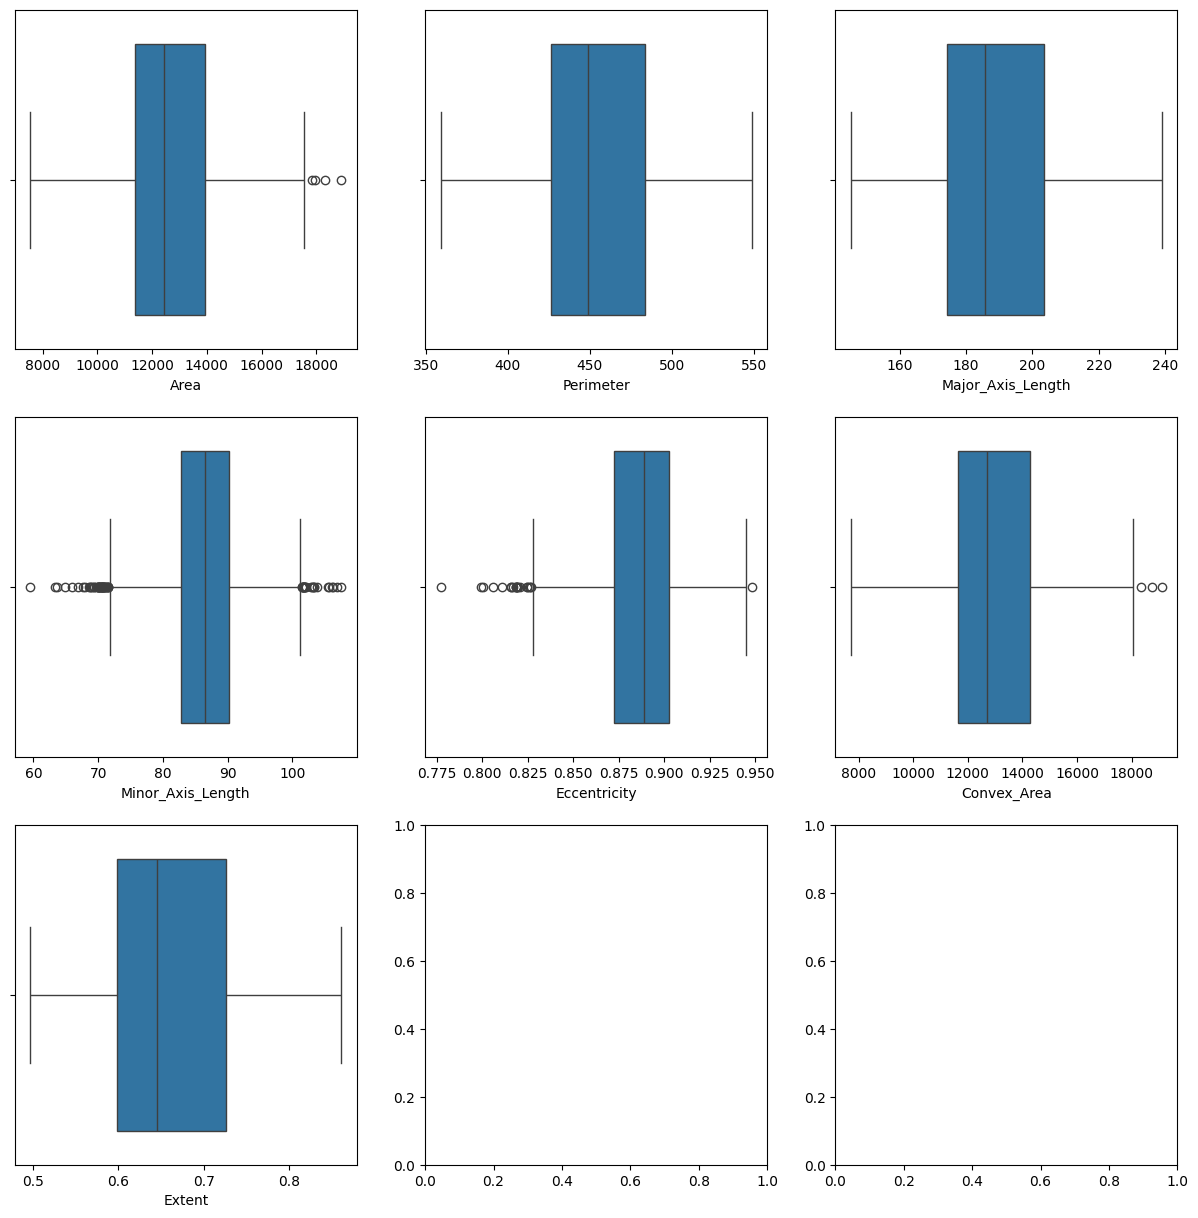

In [8]:
#VISUALIZING FEATURE DISTRIBUTIONS AND IDENTIFING OUTLIERS USING BOX-PLOTS

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(df, x = 'Area', ax = axes[0, 0])
sns.boxplot(df, x = 'Perimeter', ax = axes[0, 1])
sns.boxplot(df, x = 'Major_Axis_Length', ax = axes[0, 2])
sns.boxplot(df, x = 'Minor_Axis_Length', ax = axes[1, 0])
sns.boxplot(df, x = 'Eccentricity', ax = axes[1, 1])
sns.boxplot(df, x = 'Convex_Area', ax = axes[1, 2])
sns.boxplot(df, x = 'Extent', ax = axes[2, 0])

Dari hasil visualisasi boxplot dapat dilihat bahwa pada kolon area, minor_axis_length, eccentricity, dan convex_area terdapat nilai outlier

*Menampilkan Jumlah Data Outlier*

In [9]:
#FUNCTION TO COUNT THE OUTLIERS IN A PARTICULAR FEATURE
def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(df[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Above Upper bound
    upper = df[feature_name] >= (Q3 + 1.5 * IQR)
    # Below Lower bound
    lower = df[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))
    
#THE FEATURES WE ARE CONSIDERING FOR OUTLIER REMOVAL
features_for_outliers = ['Area', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area']

print("Number of Outlier values with respect to features : \n")

for feature in features_for_outliers:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

Area  :  4
Minor_Axis_Length  :  65
Eccentricity  :  21
Convex_Area  :  3


C:\Users\A S U S\AppData\Local\Temp\ipykernel_21072\3020116226.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[feature_name], 25, interpolation = 'midpoint')
C:\Users\A S U S\AppData\Local\Temp\ipykernel_21072\3020116226.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[feature_name], 75, interpolation = 'midpoint')


*Handling Outlier*

Nilai outlier akan diganti dengan batas bawah atau batas dari kolom yang terdapat data outlier.

In [10]:
# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for column in features_for_outliers:
    handle_outliers_iqr(df, column)

*Visualisasi Setelah Handling Outlier*

<Axes: xlabel='Convex_Area'>

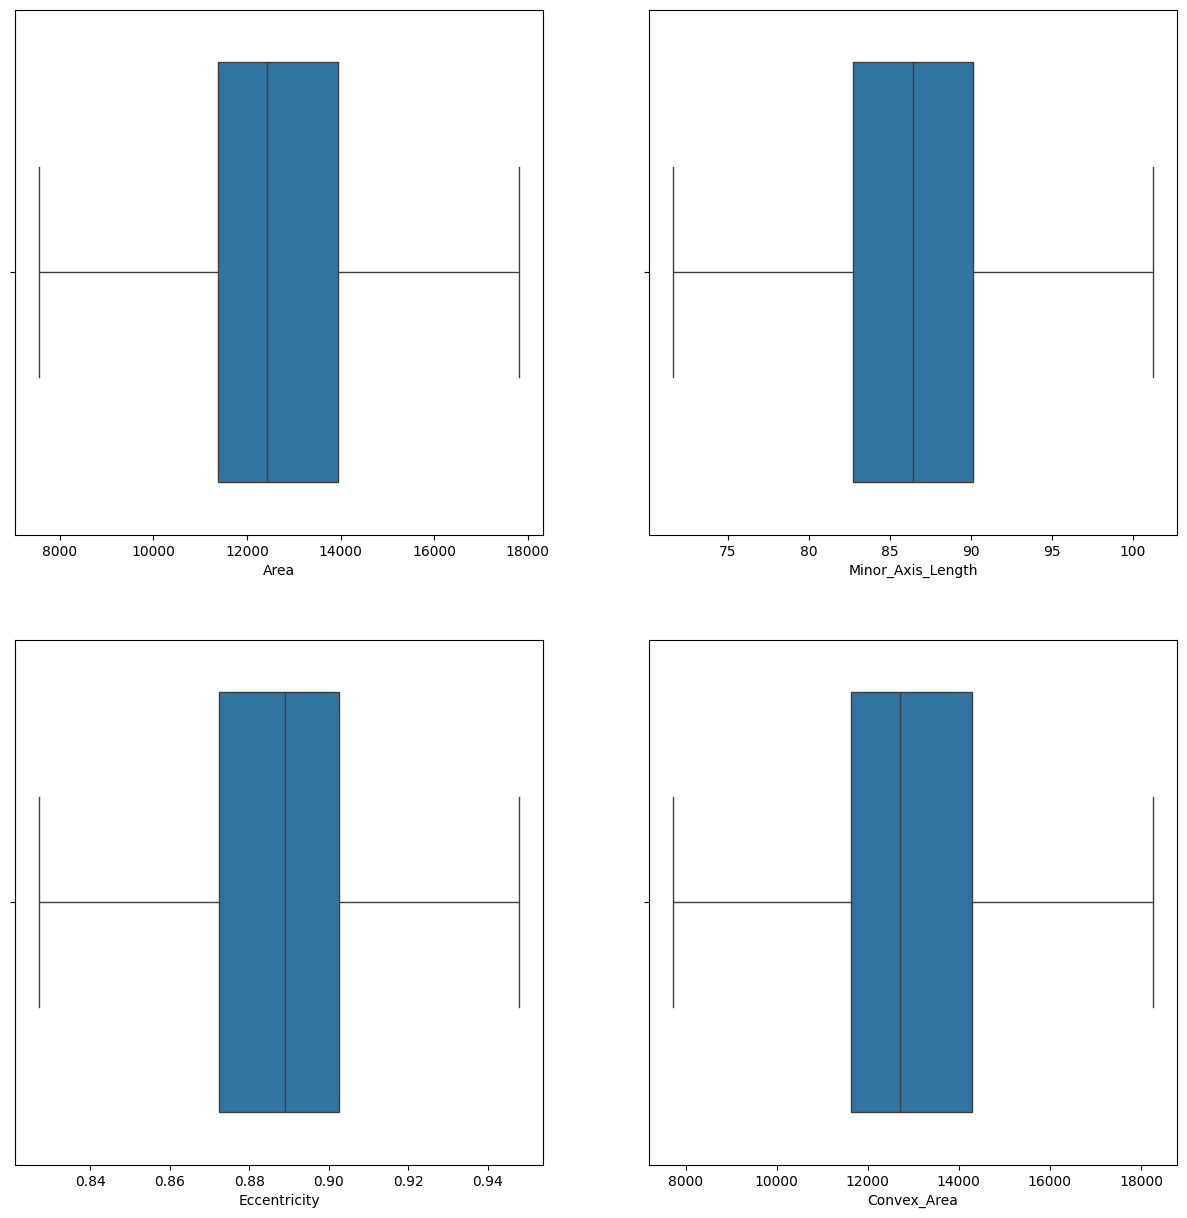

In [11]:
import seaborn as sns
#VISUALIZING FEATURE DISTRIBUTIONS AND IDENTIFING OUTLIERS USING BOX-PLOTS

fig, axes = plt.subplots(2, 2, figsize = (15, 15))
sns.boxplot(df, x = 'Area', ax = axes[0, 0])
sns.boxplot(df, x = 'Minor_Axis_Length', ax = axes[0, 1])
sns.boxplot(df, x = 'Eccentricity', ax = axes[1, 0])
sns.boxplot(df, x = 'Convex_Area', ax = axes[1, 1])


Dapat dilihat bahwa pada tiap-tiap kolom yang sebelumnya terdapat outlier, sekarang sudah tidak terdapat data outlier

### >> **Imbalance Data**
Menampilkan dan melakukan handling imbalance data (jumlah data berbeda) pada label/class

*Persentase Jumlah Data dari Tiap-Tiap Label*

In [12]:
df.Class.value_counts(normalize=True) * 100

Class
1    57.217848
0    42.782152
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

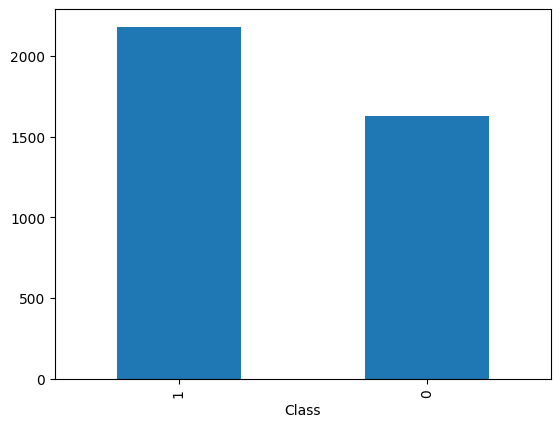

In [13]:
# memvisualkan menggunkan bar chart
df.Class.value_counts().plot(kind ='bar')

*Handling Imbalance Data*
Handling akan dilakukan menggunakan metode oversampling yaitu SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Membuat DataFrame baru dari hasil oversampling
oversampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Mengganti dataset asli dengan hasil oversampling
df = oversampled_data

*Persentase Jumlah Label Setelah Handling Imbalance Data*

In [15]:
df.Class.value_counts(normalize=True) * 100

Class
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

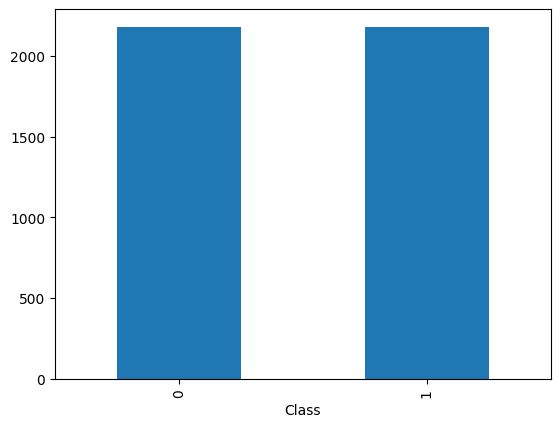

In [16]:
# memvisualkan menggunkan bar chart
df.Class.value_counts().plot(kind ='bar')

### >> **Melihat Statistical Summary dari Data**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,4360.0,12867.120585,1764.186450,7551.000000,11507.500000,12692.884071,14269.750000,17819.250000
Perimeter,4360.0,458.602620,36.052565,359.100006,429.080505,456.431503,488.585998,548.445984
Major_Axis_Length,4360.0,190.960333,17.631744,145.264465,175.638309,191.064400,205.775114,239.010498
Minor_Axis_Length,4360.0,86.666289,5.630425,71.613723,83.111773,86.778309,90.553951,101.261649
Eccentricity,4360.0,0.888720,0.020218,0.827122,0.874639,0.891996,0.903950,0.947868
Convex_Area,4360.0,13157.388716,1809.188381,7723.000000,11767.000000,12963.500000,14607.250000,18270.625000
Extent,4360.0,0.660261,0.076391,0.497413,0.597478,0.643478,0.723419,0.861050
Class,4360.0,0.500000,0.500057,0.000000,0.000000,0.500000,1.000000,1.000000


Berdasarkan tabel diatas dapat dilihat bahwa data pada dataset tersebut belum berada pada range yang sama. Hal ini perlu diatasi agar model yang dihasilkan memberikan nilai evaluasi terbaik.

### >> **Feature Scaling**
Feature Scaling akan dilakukan menggunakan metode min max scaler dimana nilai min max data akan berada dalam range yang sama.

In [18]:

scaler = MinMaxScaler()
# Fitting scaler pada data dan kemudian melakukan transformasi
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,4360.0,0.517724,0.171810,0.0,0.385314,0.500756,0.654323,1.0
Perimeter,4360.0,0.525507,0.190406,0.0,0.369591,0.514040,0.683859,1.0
Major_Axis_Length,4360.0,0.487443,0.188080,0.0,0.324001,0.488553,0.645474,1.0
Minor_Axis_Length,4360.0,0.507711,0.189910,0.0,0.387820,0.511489,0.638838,1.0
Eccentricity,4360.0,0.510144,0.167439,0.0,0.393532,0.537279,0.636282,1.0
Convex_Area,4360.0,0.515224,0.171526,0.0,0.383404,0.496842,0.652682,1.0
Extent,4360.0,0.447832,0.210075,0.0,0.275180,0.401678,0.621518,1.0
Class,4360.0,0.500000,0.500057,0.0,0.000000,0.500000,1.000000,1.0


### >> **Memilih nilai variabel X dan Y**
Variabel X akan diisi dengan kolom atribut/fitur sedangkan variabel y akan diisi dengan kolom label atau dalam hal ini yaitu kolom Class

In [20]:
# Select Attribute X and Y
X = df.drop(columns=['Class'])
y = df['Class']

### >> **Splitting Data**
Data akan dibagi dengan persentase 70% data training dan 30% data testing

In [21]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Membangun Model ANN

*Inisialisasi Model ANN yang akan dibangun*

In [22]:
# Inisialisasi ANN
model_ann = Sequential()
# Menambah input layer dan hidden layer pertama
model_ann.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
# Menambah hidden layer kedua
model_ann.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
model_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

*Training Model ANN*

In [23]:
# Meenjalankan ANN
model_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting ANN ke training set
model_ann.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
306/306 [==============================] - 1s 1ms/step - loss: 0.6886 - accuracy: 0.6383
Epoch 2/100
306/306 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.8394
Epoch 3/100
306/306 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.9066
Epoch 4/100
306/306 [==============================] - 0s 924us/step - loss: 0.2964 - accuracy: 0.9109
Epoch 5/100
306/306 [==============================] - 0s 855us/step - loss: 0.2489 - accuracy: 0.9168
Epoch 6/100
306/306 [==============================] - 0s 876us/step - loss: 0.2246 - accuracy: 0.9220
Epoch 7/100
306/306 [==============================] - 0s 1ms/step - loss: 0.2106 - accuracy: 0.9243
Epoch 8/100
306/306 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9273
Epoch 9/100
306/306 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9286
Epoch 10/100
306/306 [==============================] - 0s 999us/step - loss: 0.1932 

*Testing Model ANN*

41/41 [==============================] - 0s 669us/step


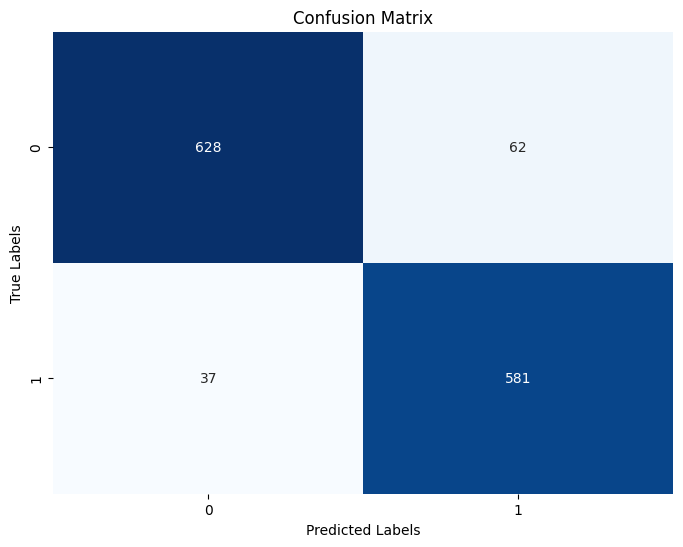

In [24]:
# Memprediksi hasil test set
y_pred = model_ann.predict(X_test)
y_pred = (y_pred > 0.5)
# Membuat confusion matrix

cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

*Akurasi Model ANN*

In [25]:
# Menghitung nilai metric evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Nilai Akurasi dari Model Tersebut adalah {:.4f}".format(accuracy))

Nilai Akurasi dari Model Tersebut adalah 0.9243


## 5. Membangun Model SVM

*Training dan Testing Model SVM*

In [26]:
# Fitting classifier to the Training set
svm_linear = SVC(kernel='linear', random_state=0) # classifier linear
svm_non_linear = SVC(kernel='rbf') # classifier non-linear using rbf
svm_linear.fit(X_train, y_train) # train linear
svm_non_linear.fit(X_train, y_train)# train non-linear
# Predicting the Test set results
y_pred_linear = svm_linear.predict(X_test) # test linear
y_pred_non_linear = svm_non_linear.predict(X_test) # test non-linear

*Akurasi Model SVM*

In [27]:
# Menghitung nilai metric evaluation
accuracy_svm_linear = accuracy_score(y_test, y_pred_linear)
accuracy_svm_non_linear = accuracy_score(y_test, y_pred_non_linear)
print("Nilai Akurasi dari Model SVM linear adalah {:.4f}".format(accuracy_svm_linear))
print("Nilai Akurasi dari Model SVM non-linear adalah {:.4f}".format(accuracy_svm_non_linear))

Nilai Akurasi dari Model SVM linear adalah 0.9243
Nilai Akurasi dari Model SVM non-linear adalah 0.9251
